# EDA Pavlo

In [99]:
!pip install pyarrow

     ---------------------------------------- 16.1/16.1 MB 4.4 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Load data

In [100]:
import pandas as pd
import seaborn as sns


df = pd.read_parquet('input_dataset-2.parquet',engine='pyarrow') 
# test dataset remove before hackaton
print(f'Dataset shape {df.shape}')
df.tail()


Dataset shape (1874087, 22)


,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,...,Bolt_5_Tensile,Bolt_6_Tensile,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
timepoints,,,,,,,,,,,,,,,,,,,,,
1971-01-25 11:06:44,308.716025,3.974309,94.425666,157.927905,5280.929965,108.057498,operation,4.193937,1637.386115,1504.557822,...,1640.704071,1690.014705,183.204777,178.082932,145.759475,225.351989,300.667011,160.949816,0.159366,0.491265
1971-01-25 11:06:45,308.746393,4.103262,94.429003,157.974925,5280.633358,108.057492,operation,4.193254,1637.365865,1504.546091,...,1640.711250,1690.017029,183.203293,178.082287,145.766584,225.348279,300.674243,160.947868,0.155962,0.497242
1971-01-25 11:06:46,308.776762,4.472929,94.432340,158.021945,5280.336751,108.057486,operation,4.193261,1637.384133,1504.538696,...,1640.699142,1690.002008,183.212397,178.081678,145.764007,225.354785,300.674078,160.947644,0.141150,0.501525
1971-01-25 11:06:47,308.807131,4.842597,94.435677,158.068966,5280.040144,108.057479,operation,4.192795,1637.357141,1504.531582,...,1640.685782,1689.995135,183.212669,178.080734,145.763103,225.355483,300.675584,160.944036,0.160915,0.508167
1971-01-25 11:06:48,308.837499,5.212264,94.439014,158.115137,5279.835631,108.057473,operation,4.192640,1637.344985,1504.525065,...,1640.698392,1690.004759,183.209714,178.084189,145.766948,225.356568,300.675411,160.947503,0.163011,0.512094


## Explore data

In [101]:
df.describe()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,...,Bolt_5_Tensile,Bolt_6_Tensile,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
count,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,...,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.068018e+06,1.068018e+06
mean,2.977542e+02,5.989380e+00,9.105910e+01,1.577165e+02,5.312681e+03,1.079521e+02,3.185047e+00,1.613279e+03,1.490365e+03,1.690256e+03,...,1.637421e+03,1.679710e+03,1.784819e+02,1.657813e+02,1.462637e+02,2.257179e+02,2.986768e+02,1.618114e+02,1.454601e-01,4.567642e-01
std,3.387414e+01,8.155810e+00,8.714153e+00,1.909088e+01,2.990343e+01,2.902935e+00,4.765675e-01,1.063794e+01,6.480423e+00,4.674528e+00,...,2.007034e+00,4.540256e+00,2.019696e+00,4.113352e+00,2.145015e-01,2.001803e-01,7.708676e-01,3.447038e-01,2.508660e-02,2.421547e-01
min,0.000000e+00,-3.811665e+01,0.000000e+00,1.353587e+02,3.621803e+03,6.264306e-01,2.402152e+00,1.522557e+03,1.425511e+03,1.665702e+03,...,1.587784e+03,1.608899e+03,1.753436e+02,1.629430e+02,1.457152e+02,2.243099e+02,2.977115e+02,1.608971e+02,5.138796e-02,1.300494e-01
25%,3.069059e+02,0.000000e+00,9.331226e+01,1.488042e+02,5.298511e+03,1.080113e+02,2.805074e+00,1.604473e+03,1.484862e+03,1.686002e+03,...,1.636916e+03,1.676754e+03,1.768119e+02,1.632180e+02,1.460956e+02,2.256090e+02,2.980816e+02,1.616467e+02,1.363742e-01,4.458940e-01
50%,3.098457e+02,6.300167e+00,9.404115e+01,1.516418e+02,5.303462e+03,1.080553e+02,3.176576e+00,1.611077e+03,1.489436e+03,1.689645e+03,...,1.637458e+03,1.677958e+03,1.783134e+02,1.642139e+02,1.463355e+02,2.257666e+02,2.985405e+02,1.618121e+02,1.467246e-01,4.788169e-01
75%,3.112799e+02,1.117088e+01,9.448438e+01,1.566876e+02,5.316882e+03,1.080889e+02,3.505450e+00,1.618607e+03,1.493730e+03,1.692938e+03,...,1.637769e+03,1.681526e+03,1.796520e+02,1.655471e+02,1.464563e+02,2.258674e+02,2.990896e+02,1.620740e+02,1.555545e-01,4.995086e-01
max,3.233023e+02,4.910232e+01,9.618052e+01,2.734938e+02,5.512772e+03,1.083688e+02,4.611985e+00,1.640510e+03,1.505455e+03,1.702324e+03,...,1.642896e+03,1.694804e+03,1.834105e+02,1.788814e+02,1.471180e+02,2.260519e+02,3.012224e+02,1.629766e+02,1.355756e+00,5.316383e+01


In [107]:
df.isnull().sum()

Unit_4_Power                      124087
Unit_4_Reactive Power             124087
Turbine_Guide Vane Opening        124087
Turbine_Pressure Drafttube        124087
Turbine_Pressure Spiral Casing    124087
Turbine_Rotational Speed          124087
mode                                   0
Bolt_1_Steel tmp                  124087
Bolt_1_Tensile                    124087
Bolt_2_Tensile                    124087
Bolt_3_Tensile                    124087
Bolt_4_Tensile                    124087
Bolt_5_Tensile                    124087
Bolt_6_Tensile                    124087
Bolt_1_Torsion                    124087
Bolt_2_Torsion                    124087
Bolt_3_Torsion                    124087
Bolt_4_Torsion                    124087
Bolt_5_Torsion                    124087
Bolt_6_Torsion                    124087
lower_bearing_vib_vrt             806069
turbine_bearing_vib_vrt           806069
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1874087 entries, 1970-12-19 09:51:44 to 1971-01-25 11:06:48
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unit_4_Power                    float64
 1   Unit_4_Reactive Power           float64
 2   Turbine_Guide Vane Opening      float64
 3   Turbine_Pressure Drafttube      float64
 4   Turbine_Pressure Spiral Casing  float64
 5   Turbine_Rotational Speed        float64
 6   mode                            object 
 7   Bolt_1_Steel tmp                float64
 8   Bolt_1_Tensile                  float64
 9   Bolt_2_Tensile                  float64
 10  Bolt_3_Tensile                  float64
 11  Bolt_4_Tensile                  float64
 12  Bolt_5_Tensile                  float64
 13  Bolt_6_Tensile                  float64
 14  Bolt_1_Torsion                  float64
 15  Bolt_2_Torsion                  float64
 16  Bolt_3_Torsion                  float64

In [103]:
# to categorical
df['mode'] = df['mode'].astype("category")

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1874087 entries, 1970-12-19 09:51:44 to 1971-01-25 11:06:48
Data columns (total 22 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   Unit_4_Power                    float64 
 1   Unit_4_Reactive Power           float64 
 2   Turbine_Guide Vane Opening      float64 
 3   Turbine_Pressure Drafttube      float64 
 4   Turbine_Pressure Spiral Casing  float64 
 5   Turbine_Rotational Speed        float64 
 6   mode                            category
 7   Bolt_1_Steel tmp                float64 
 8   Bolt_1_Tensile                  float64 
 9   Bolt_2_Tensile                  float64 
 10  Bolt_3_Tensile                  float64 
 11  Bolt_4_Tensile                  float64 
 12  Bolt_5_Tensile                  float64 
 13  Bolt_6_Tensile                  float64 
 14  Bolt_1_Torsion                  float64 
 15  Bolt_2_Torsion                  float64 
 16  Bolt_3_Torsion       

In [ ]:
df.tail()

In [105]:
# check out duplicates 
df[df.duplicated()]

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,...,Bolt_5_Tensile,Bolt_6_Tensile,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
timepoints,,,,,,,,,,,,,,,,,,,,,


In [109]:
df['mode'].unique()

['operation', 'start']
Categories (2, object): ['operation', 'start']

In [106]:
# check the balance
df['mode'].value_counts()

operation    1868659
start           5428
Name: mode, dtype: int64

In [315]:
# dff = df.sample(n=100000)
dff = df.copy()

In [316]:
dff['mode'].value_counts()

operation    1868659
start           5428
Name: mode, dtype: int64

## Visualization

In [ ]:
sns.scatterplot(dff['mode'])

In [ ]:
sns.pairplot(
    data=dff,
    # hue='mode',
    height=4)

<AxesSubplot:xlabel='Bolt_5_Tensile', ylabel='Count'>

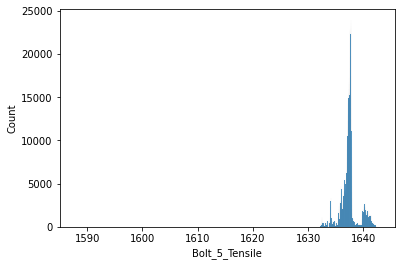

In [464]:
sns.histplot(dff['Bolt_5_Tensile'])


In [124]:
columns = dff.columns
columns

Index(['Unit_4_Power', 'Unit_4_Reactive Power', 'Turbine_Guide Vane Opening',
       'Turbine_Pressure Drafttube', 'Turbine_Pressure Spiral Casing',
       'Turbine_Rotational Speed', 'mode', 'Bolt_1_Steel tmp',
       'Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile',
       'Bolt_5_Tensile', 'Bolt_6_Tensile', 'Bolt_1_Torsion', 'Bolt_2_Torsion',
       'Bolt_3_Torsion', 'Bolt_4_Torsion', 'Bolt_5_Torsion', 'Bolt_6_Torsion',
       'lower_bearing_vib_vrt', 'turbine_bearing_vib_vrt'],
      dtype='object')

In [317]:
dff['mode'] = pd.get_dummies(dff['mode'],drop_first=True)


In [473]:
selected_columns = ['Unit_4_Power', 'Unit_4_Reactive Power', 'Turbine_Guide Vane Opening',
       'Turbine_Pressure Drafttube', 'Turbine_Pressure Spiral Casing',
       'Turbine_Rotational Speed', 'mode', 'Bolt_1_Steel tmp',
       'Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile',
       'Bolt_5_Tensile', 'Bolt_6_Tensile', 
       'lower_bearing_vib_vrt', 'turbine_bearing_vib_vrt']
dfff = dff[selected_columns]
dfff.tail()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,Bolt_4_Tensile,Bolt_5_Tensile,Bolt_6_Tensile,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
timepoints,,,,,,,,,,,,,,,,
1971-01-25 11:06:44,308.716025,3.974309,94.425666,157.927905,5280.929965,108.057498,0,4.193937,1637.386115,1504.557822,1701.651420,1606.276545,1640.704071,1690.014705,0.159366,0.491265
1971-01-25 11:06:45,308.746393,4.103262,94.429003,157.974925,5280.633358,108.057492,0,4.193254,1637.365865,1504.546091,1701.654301,1606.271877,1640.711250,1690.017029,0.155962,0.497242
1971-01-25 11:06:46,308.776762,4.472929,94.432340,158.021945,5280.336751,108.057486,0,4.193261,1637.384133,1504.538696,1701.656143,1606.250028,1640.699142,1690.002008,0.141150,0.501525
1971-01-25 11:06:47,308.807131,4.842597,94.435677,158.068966,5280.040144,108.057479,0,4.192795,1637.357141,1504.531582,1701.662201,1606.245665,1640.685782,1689.995135,0.160915,0.508167
1971-01-25 11:06:48,308.837499,5.212264,94.439014,158.115137,5279.835631,108.057473,0,4.192640,1637.344985,1504.525065,1701.658131,1606.286286,1640.698392,1690.004759,0.163011,0.512094


In [474]:
dfff.isna().sum()

Unit_4_Power                      124087
Unit_4_Reactive Power             124087
Turbine_Guide Vane Opening        124087
Turbine_Pressure Drafttube        124087
Turbine_Pressure Spiral Casing    124087
Turbine_Rotational Speed          124087
mode                                   0
Bolt_1_Steel tmp                  124087
Bolt_1_Tensile                    124087
Bolt_2_Tensile                    124087
Bolt_3_Tensile                    124087
Bolt_4_Tensile                    124087
Bolt_5_Tensile                    124087
Bolt_6_Tensile                    124087
lower_bearing_vib_vrt             806069
turbine_bearing_vib_vrt           806069
dtype: int64

In [475]:
dfff.dropna(inplace=True)

C:\Users\pkochkin\AppData\Local\Temp\ipykernel_25552\4073684918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfff.dropna(inplace=True)


In [320]:
for col in dfff.columns:
    dfff[col].fillna(dfff[col].mode()[0],inplace=True)

C:\Users\pkochkin\AppData\Local\Temp\ipykernel_25552\105776383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfff[col].fillna(dfff[col].mode()[0],inplace=True)
C:\Users\pkochkin\AppData\Local\Temp\ipykernel_25552\105776383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfff[col].fillna(dfff[col].mode()[0],inplace=True)
C:\Users\pkochkin\AppData\Local\Temp\ipykernel_25552\105776383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [476]:
dfff.isna().sum()

Unit_4_Power                      0
Unit_4_Reactive Power             0
Turbine_Guide Vane Opening        0
Turbine_Pressure Drafttube        0
Turbine_Pressure Spiral Casing    0
Turbine_Rotational Speed          0
mode                              0
Bolt_1_Steel tmp                  0
Bolt_1_Tensile                    0
Bolt_2_Tensile                    0
Bolt_3_Tensile                    0
Bolt_4_Tensile                    0
Bolt_5_Tensile                    0
Bolt_6_Tensile                    0
lower_bearing_vib_vrt             0
turbine_bearing_vib_vrt           0
dtype: int64

In [595]:
dfff['mode'].value_counts()

0    939953
1      3978
Name: mode, dtype: int64

<AxesSubplot:>

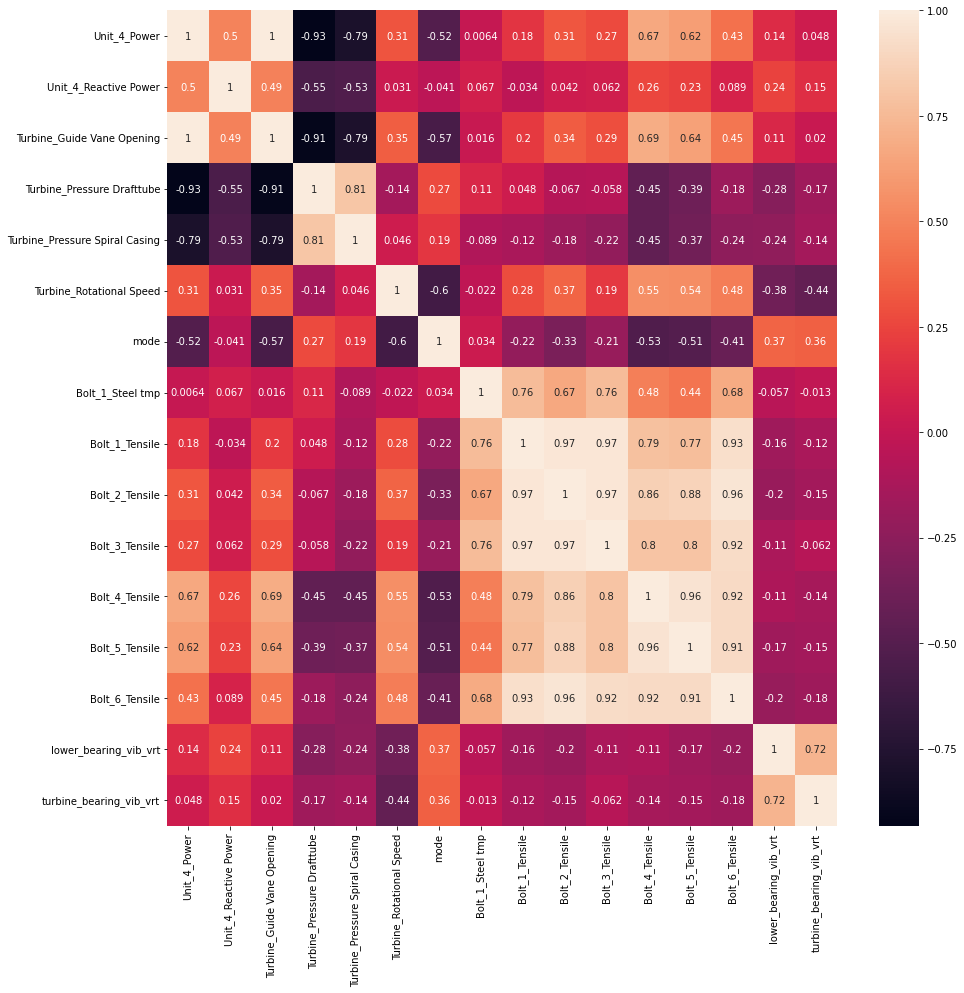

In [598]:
fig = plt.figure(figsize=(15,15))


sns.heatmap(dfff.corr(),annot=True)

In [599]:
cols = ['Unit_4_Power', 'Unit_4_Reactive Power', 'Turbine_Guide Vane Opening',
       'Turbine_Pressure Drafttube', 'Turbine_Pressure Spiral Casing',
       'Turbine_Rotational Speed', 'mode']
X = dfff[cols]
X.shape

(943931, 7)

In [600]:
# targets
y = dfff[['Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile',
       'Bolt_5_Tensile', 'Bolt_6_Tensile']]



# ML

In [601]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((755144, 7), (755144, 6), (188787, 7), (188787, 6))

In [602]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error




In [607]:
def eval_model(model):
    for col in y_train.columns:
        train = y_train[col]
        test = y_test[col]
        model.fit(X_train,train)
        # err = mean_absolute_percentage_error(model.predict(X_test),test)
        err = model.score(X_test,test)
        print(col,err)
        dump(model, f'{col}.joblib')


In [604]:
model = LinearRegression()
eval_model(model)

Bolt_1_Tensile 0.5578545129945025


In [605]:
model = GradientBoostingRegressor(learning_rate=.5,n_estimators=40,max_depth=7)
eval_model(model)

Bolt_1_Tensile 0.9836581244962651


In [606]:
from joblib import dump, load
dump(model, 'kraft.joblib') 


['kraft.joblib']

In [359]:
model = LinearRegression()
eval_model(model)

Bolt_1_Tensile 0.5045061247760181


In [438]:
from sklearn.model_selection import cross_val_score, validation_curve, learning_curve


train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(LinearRegression(), X, y, cv=4,return_times=True)
# train_scores, test_scores = validation_curve(model, X, y, param_name='learning_rate', param_range=[0.1,1,2], cv=4)


In [441]:
X.shape

(1000000, 7)

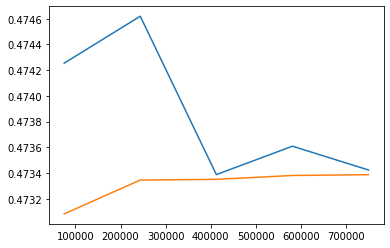

In [440]:
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))

In [125]:
selected_columns = ['mode','Bolt_1_Tensile','Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile',
       'Bolt_5_Tensile', 'Bolt_6_Tensile']
dfff = dff[selected_columns]
dfff.tail()

,mode,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,Bolt_4_Tensile,Bolt_5_Tensile,Bolt_6_Tensile
timepoints,,,,,,,
1971-01-18 04:59:30,operation,1631.388464,1500.695800,1697.755753,1606.738842,1641.016772,1688.345477
1971-01-22 22:18:47,operation,1629.974608,1498.509011,1695.982596,1601.323903,1635.866459,1682.506125
1971-01-09 22:02:45,operation,1619.033874,1493.798656,1692.620333,1603.083281,1637.227740,1681.165449
1971-01-09 23:44:15,operation,1619.126174,1493.784904,1692.605197,1603.034837,1637.142914,1681.400220
1971-01-06 22:49:16,operation,1617.747775,1493.805863,1692.767917,1603.166713,1637.437617,1681.242728


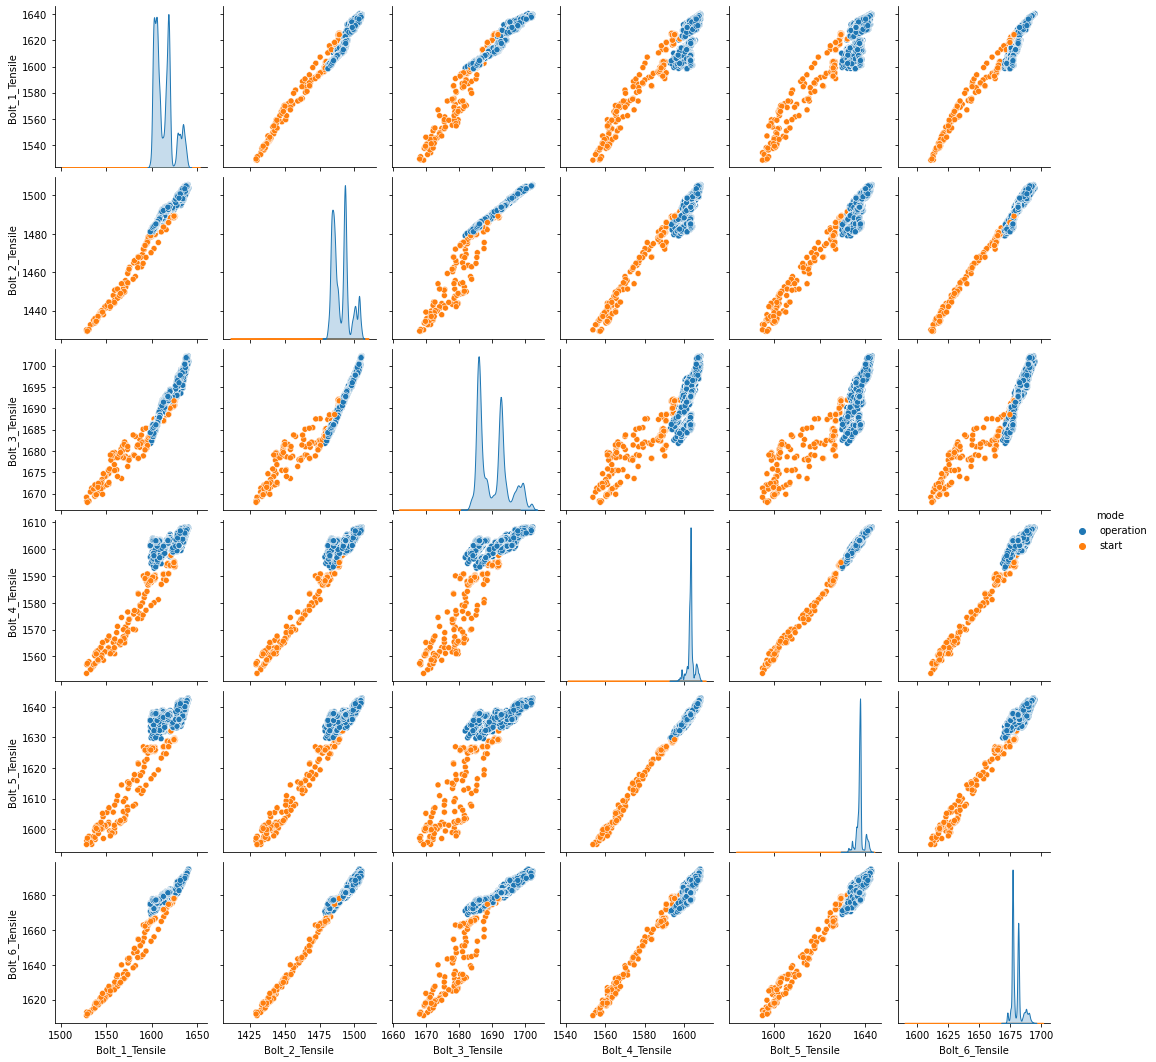

In [127]:
sns.pairplot(dfff,hue='mode')

In [129]:
ts = dfff.index
ts

DatetimeIndex(['1970-12-22 19:32:01', '1970-12-21 02:54:11',
               '1971-01-10 06:18:04', '1971-01-08 10:16:29',
               '1971-01-05 16:38:53', '1971-01-04 17:06:51',
               '1971-01-05 18:55:58', '1971-01-22 19:33:26',
               '1971-01-03 16:25:05', '1970-12-20 09:56:24',
               ...
               '1971-01-03 15:05:28', '1971-01-08 12:34:10',
               '1970-12-22 13:34:26', '1970-12-23 13:35:49',
               '1971-01-11 19:18:42', '1971-01-18 04:59:30',
               '1971-01-22 22:18:47', '1971-01-09 22:02:45',
               '1971-01-09 23:44:15', '1971-01-06 22:49:16'],
              dtype='datetime64[ns]', name='timepoints', length=100000, freq=None)

<AxesSubplot:xlabel='timepoints', ylabel='Count'>

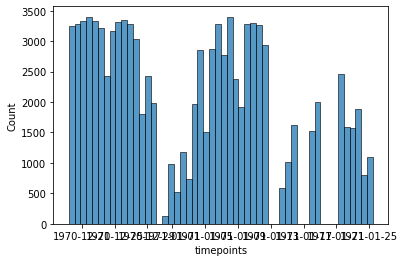

In [140]:
sns.histplot(dfff.index)

In [142]:
import numpy as np
dt = np.diff(dfff.index)/1e9
dt

array([ -146270,  1740233,  -158495, ..., -1124162,     6090,  -262499],
      dtype='timedelta64[ns]')

In [154]:
dt = np.insert(dt,0,0)

In [157]:
dfff = dfff.assign(dt=dt)

In [158]:
dfff[dfff['mode']=='start']

,mode,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,Bolt_4_Tensile,Bolt_5_Tensile,Bolt_6_Tensile,dt
timepoints,,,,,,,,
1971-01-02 08:28:49,start,1596.481431,1478.325416,1683.124124,1587.316799,1625.806387,1663.651158,-1 days +23:59:59.999374051
1971-01-04 04:41:59,start,1598.626935,1478.758473,1683.347914,1587.930763,1625.666874,1664.703760,0 days 00:00:00.001089701
1971-01-01 16:12:40,start,1596.109513,1477.520160,1682.662025,1587.372522,1625.899723,1663.837771,0 days 00:00:00.001096482
1971-01-17 15:01:54,start,1621.271892,1491.573301,1691.979874,1597.738358,1632.198347,1679.981173,0 days 00:00:00.000695818
1970-12-29 04:43:48,start,1594.508305,1474.898380,1680.672198,1590.022845,1626.491643,1663.256352,-1 days +23:59:59.999108037
...,...,...,...,...,...,...,...,...
1971-01-05 14:47:40,start,1601.096299,1480.572201,1684.658551,1589.538636,1626.533484,1665.571950,0 days 00:00:00.000897089
1971-01-04 04:42:59,start,1598.960336,1478.999070,1683.515320,1588.193421,1625.894547,1664.832891,-1 days +23:59:59.999315893
1970-12-29 04:41:48,start,1539.050122,1434.482892,1669.740797,1560.917803,1600.253567,1618.046880,0 days 00:00:00.000122158


In [172]:
dfff.dt.dt.seconds

timepoints
1970-12-22 19:32:01        0
1970-12-21 02:54:11    86399
1971-01-10 06:18:04        0
1971-01-08 10:16:29    86399
1971-01-05 16:38:53    86399
                       ...  
1971-01-18 04:59:30        0
1971-01-22 22:18:47        0
1971-01-09 22:02:45    86399
1971-01-09 23:44:15        0
1971-01-06 22:49:16    86399
Name: dt, Length: 100000, dtype: int64

<AxesSubplot:xlabel='mode', ylabel='count'>

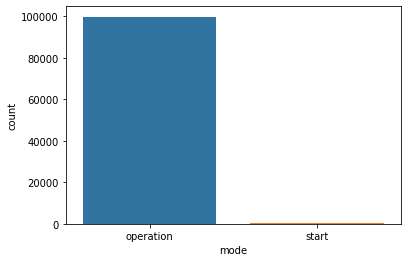

In [128]:
sns.countplot(x=dff['mode'])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,9))
plt.title('Comparison between various species based on sapel length and width')
sns.scatterplot(
    x=df['sepal_length'],
    y=df['sepal_width'],
    hue =df['species'],
    s=50)

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Comparison between various species based on petal lenght and width')
sns.scatterplot(
    x=df['petal_length'], 
    y=df['petal_width'], 
    hue = df['species'], 
    s= 50)

In [ ]:
sns.heatmap(
    df.corr(),
    annot=True)

In [ ]:
# Checking Mean & Median Values for each species

df.groupby('species').agg(['mean', 'median'])

In [ ]:
# box plots

fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='petal_width', x= 'species', data=df, orient='v' , ax=axes[0, 0])
sns.boxplot( y='petal_length', x= 'species', data=df, orient='v' , ax=axes[0, 1])
sns.boxplot( y='sepal_length', x= 'species', data=df, orient='v' , ax=axes[1, 0])
sns.boxplot( y='sepal_width', x= 'species', data=df, orient='v' , ax=axes[1, 1])
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))

sns.histplot(
    data=df,
    x='sepal_length',
    hue='species',
    ax=axes[0,0],
)

sns.histplot(
    data=df,
    x='petal_length',
    hue='species',
    ax=axes[0,1],
)

sns.histplot(
    data=df,
    x='sepal_width',
    hue='species',
    ax=axes[1,0],
)

sns.histplot(
    data=df,
    x='petal_width',
    hue='species',
    ax=axes[1,1],
)

## Data cleaning and encoding

In [ ]:
# encoding categorical
dff = pd.get_dummies(df,columns=['species'],drop_first=False)


In [ ]:
dff.head()

# Model

### Prepare data

In [ ]:
from sklearn.model_selection import train_test_split

y = df.pop()
X_train, X_test, y_train, t_test = train_test_split(df, y, test_size=0.2)

### Train

#### Simple models

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

#### Ensembles

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

## Hyperparameter tuning